# Instructions
In `dibecs_3.3.0` run
+ `pip install "calibr8>=5.0.3"`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas
import pathlib
import numpy
from matplotlib import cm, pyplot

import retl
import calibr8
import robotools

import cutisplit
import run_9REA8P

### Calibration p-Nitrophenol concentration/absorbance
Needed for quantification of cutinase reaction product in [mM].

In [3]:
df_calibration = run_9REA8P.get_df_calibration()
df_calibration

,concentration,absorbance
H12,0.0001,0.4116
H10,0.0001,0.4391
G12,0.0001,0.4033
G11,0.0001,0.3865
G10,0.0001,0.3941
...,...,...
D11,2.5000,NaN
D10,2.5000,NaN
E12,2.6000,NaN
E10,2.6000,NaN


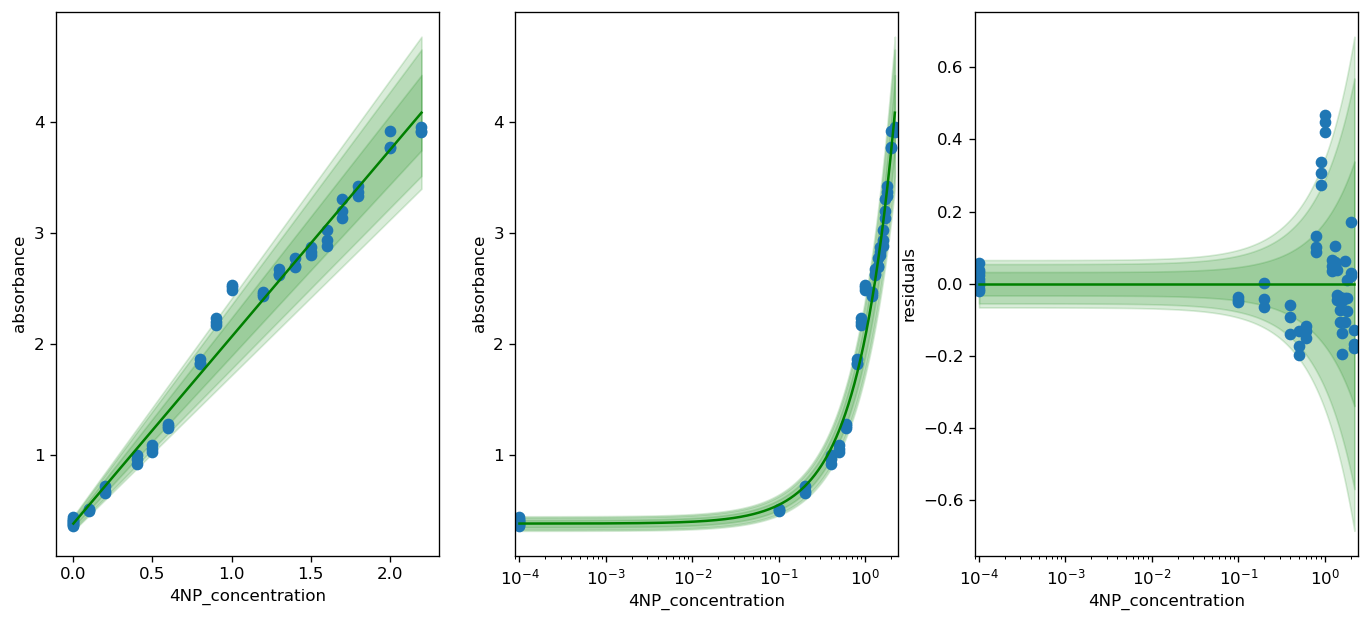

In [4]:
cm_nitrophenol = cutisplit.NitrophenolAbsorbanceModel()
theta_fit, _ = calibr8.fit_scipy(
    model=cm_nitrophenol,
    independent=df_calibration.dropna().concentration.values,
    dependent=df_calibration.dropna().absorbance.values,
    theta_guess=[0.5, 2, 0.1, 0.1, 30],
    theta_bounds=[
        (0.001, 50)
    ] * len(cm_nitrophenol.theta_names)
)
cm_nitrophenol.save("9REA8P_cm_nitrophenol.json")

fig, axs = calibr8.plot_model(cm_nitrophenol)
pyplot.show()